1. Open notebook with imports and functions (?) called FrancescoTerenzi_227022
2. Open github with our solutions to the hmws
    * Pandas [hmw1](https://github.com/epfl-ada-2018/homework-1-pizzahamburgercereali_hw1/blob/master/Exercise%201.ipynb)
    * Viz [hmw2](https://github.com/epfl-ada-2018/homework-2-pizzhambcereali_hw2/blob/master/HW2_main.ipynb)
    * Spark [hmw3](https://github.com/epfl-ada-2018/homework-3-pizzhambcereali_hw2/blob/master/Homework3.ipynb)
    * ML [hmw4](https://github.com/epfl-ada-2018/homework-4-pizzhambcereali_hw2/blob/master/Homework%204.ipynb)

In [1]:
path_to_snippets = '../../../../Programming/Python/Snippets/' # todo change here the path to the snippets

In [2]:
import pandas as pd
import seaborn as sns
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
if path_to_snippets not in sys.path:
    sys.path.append(path_to_snippets) 
sys.path

import plot
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Question 1: Exploring the data - 30 points 
----

## Import files

In [3]:
# import files
pokemons = pd.read_csv('./pokemon.csv', index_col=0)
pokemons.head()

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [4]:
combats = pd.read_csv('./combats.csv')
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


## Data analysis

(6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [5]:
# convert to float 0,1 legendary
print(pokemons['Legendary'].dtypes)
pokemons['Legendary'] = (pokemons['Legendary'] == True).astype(np.uint8)
pokemons.head(4)

bool


,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,0


In [6]:
# count classes
classes1 = set(pokemons['Class 1'])
# count classes
classes2 = set(pokemons['Class 2'])

print('Nb of classes {}'.format(len(classes1 | classes2)))

Nb of classes 19


### Attack

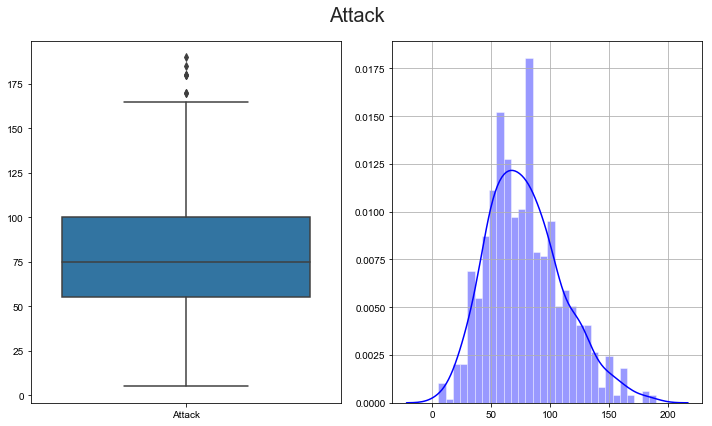

,count,mean,std,min,25%,50%,75%,max
Attack,800.0,79.00125,32.457366,5.0,55.0,75.0,100.0,190.0


In [7]:
plot.describe_data(pokemons['Attack'], title='Attack', nb_bins=30, figsize=(10, 6))

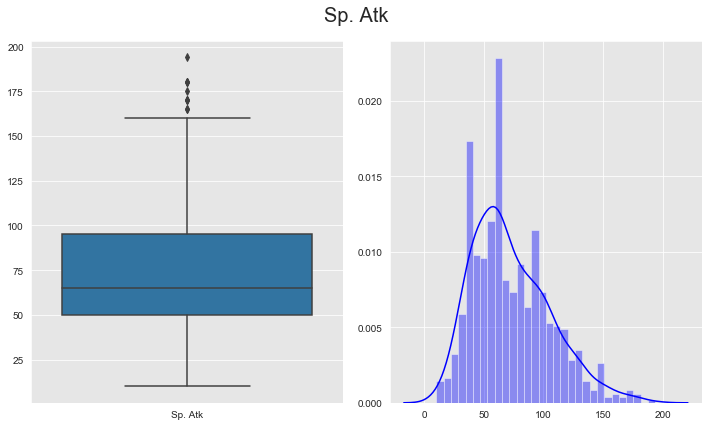

,count,mean,std,min,25%,50%,75%,max
Sp. Atk,800.0,72.82,32.722294,10.0,49.75,65.0,95.0,194.0


In [8]:
plot.describe_data(pokemons['Sp. Atk'], title='Sp. Atk', nb_bins=30, figsize=(10, 6))

### Defense

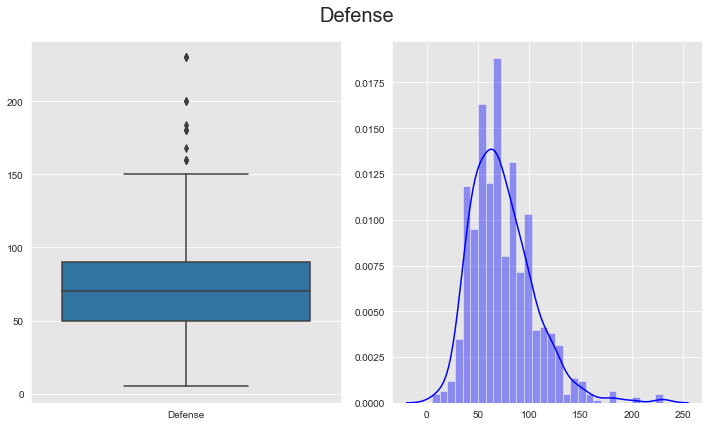

,count,mean,std,min,25%,50%,75%,max
Defense,800.0,73.8425,31.183501,5.0,50.0,70.0,90.0,230.0


In [9]:
plot.describe_data(pokemons['Defense'], title='Defense', nb_bins=30)

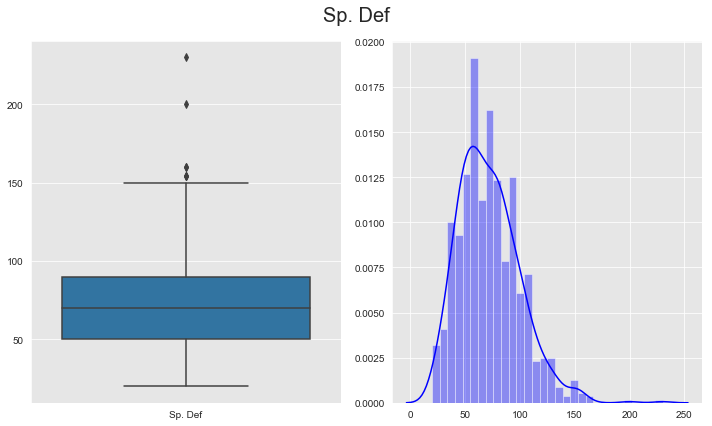

,count,mean,std,min,25%,50%,75%,max
Sp. Def,800.0,71.9025,27.828916,20.0,50.0,70.0,90.0,230.0


In [10]:
plot.describe_data(pokemons['Sp. Def'], title='Sp. Def', nb_bins=30, figsize=(10, 6))

### Speed

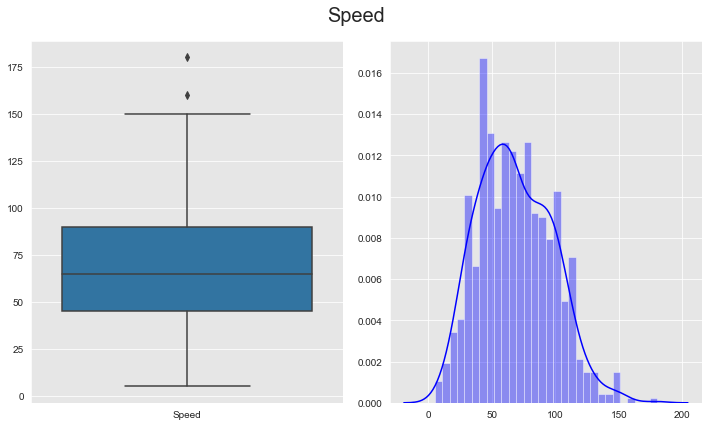

,count,mean,std,min,25%,50%,75%,max
Speed,800.0,68.2775,29.060474,5.0,45.0,65.0,90.0,180.0


In [11]:
plot.describe_data(pokemons['Speed'], title='Speed', nb_bins=30, figsize=(10, 6))

In [12]:
grouped_medians_speed =  pokemons[['Speed','Class 1']].groupby('Class 1').agg('median')
min_speed = grouped_medians_speed[grouped_medians_speed == grouped_medians_speed.min()].dropna().index.values[0]
max_speed = grouped_medians_speed[grouped_medians_speed == grouped_medians_speed.max()].dropna().index.values[0]

In [13]:
grouped_medians_speed[grouped_medians_speed == grouped_medians_speed.min()].dropna().index.values[0]

'Fairy'

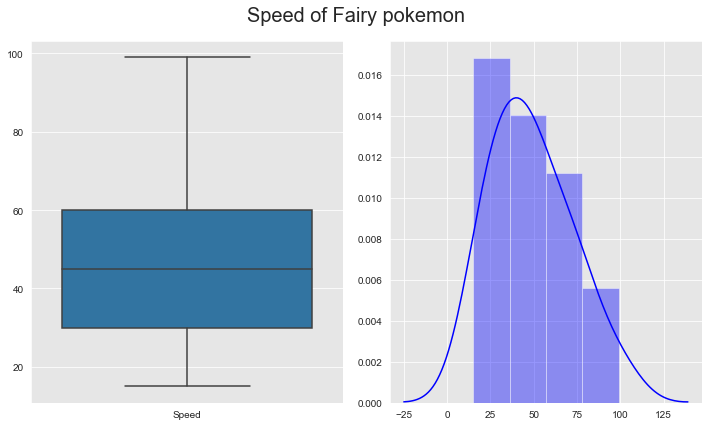

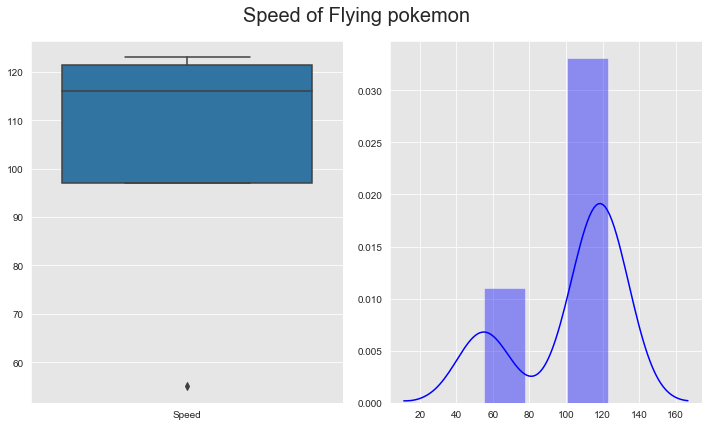

In [14]:
for cat in [min_speed, max_speed]:
    plot.describe_data(pokemons[pokemons['Class 1'] == cat]['Speed'], title='Speed of {} pokemon'.format(cat))

### HP

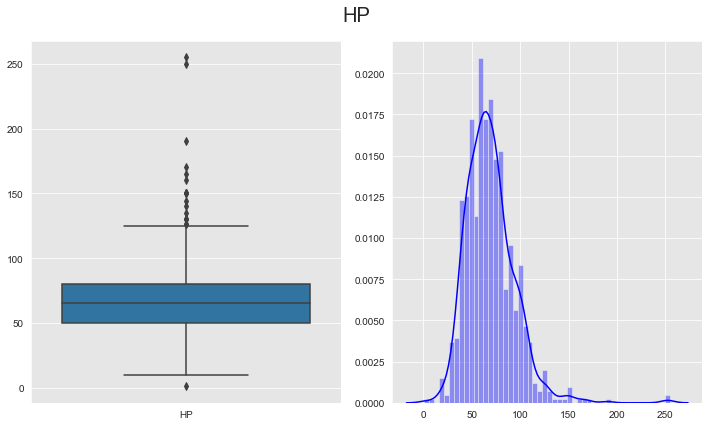

,count,mean,std,min,25%,50%,75%,max
HP,800.0,69.25875,25.534669,1.0,50.0,65.0,80.0,255.0


In [15]:
plot.describe_data(serie=pokemons.HP, title='HP', nb_bins=50)

### Pairwise

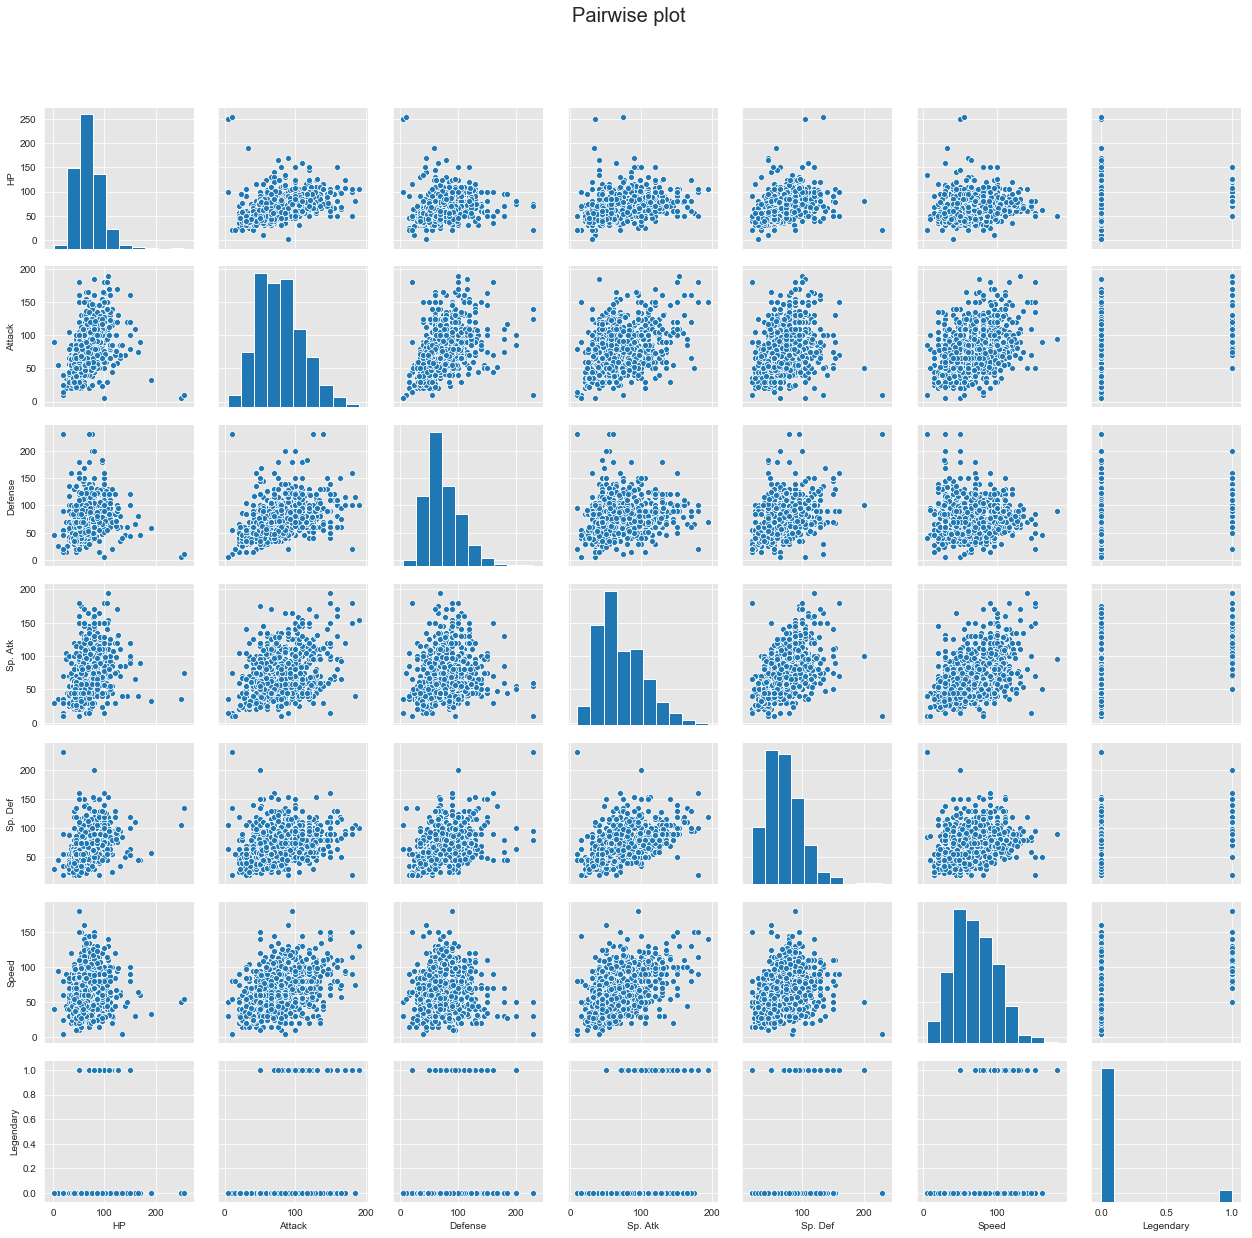

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
HP,1.000000,0.565734,0.433402,0.470813,0.493280,0.265920,0.295348
Attack,0.565734,1.000000,0.514995,0.361616,0.320620,0.373443,0.316741
Defense,0.433402,0.514995,1.000000,0.314217,0.578816,0.092818,0.268258
Sp. Atk,0.470813,0.361616,0.314217,1.000000,0.571757,0.460220,0.372532
Sp. Def,0.493280,0.320620,0.578816,0.571757,1.000000,0.320649,0.329321
Speed,0.265920,0.373443,0.092818,0.460220,0.320649,1.000000,0.313383
Legendary,0.295348,0.316741,0.268258,0.372532,0.329321,0.313383,1.000000


In [16]:
plot.pairwise_plot(pokemons)

In [17]:
classes1

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water'}

### Legendary

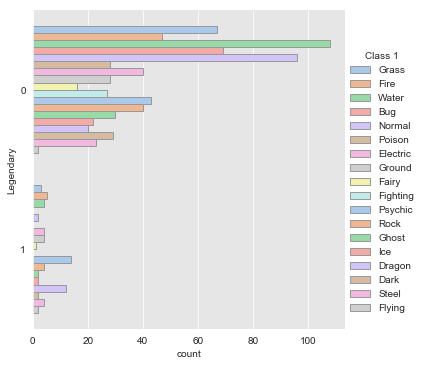

In [18]:
sns.catplot(y="Legendary", hue="Class 1", kind="count",
            palette='pastel', edgecolor=".6",
            data=pokemons);

(4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
visualize the relation between these two variables using an appropriate plot;
* list the names of the 3 Pokémon with highest attack-over-defense ratio;
* list the names of the 3 Pokémon with lowest attack-over-defense ratio;
* list the names of the 10 Pokémon with the largest number of victories.

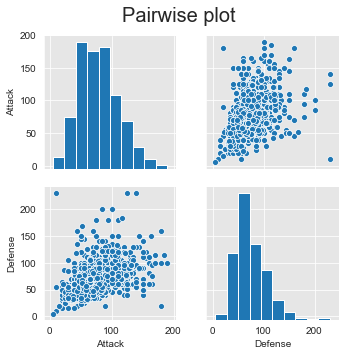

In [19]:
plot.pairwise_plot(pokemons[['Attack', 'Defense']]);

In [20]:
pokemons['attack_over_defense'] = pokemons['Attack']/pokemons['Defense']
print('lowest: ')
pokemons.sort_values(by='attack_over_defense', ascending=True).head(3)[['Name', 'attack_over_defense']]

lowest: 


,Name,attack_over_defense
pid,,
231,Shuckle,0.043478
140,Magikarp,0.181818
485,Bronzor,0.279070


In [21]:
print('highest: ')
pokemons.sort_values(by='attack_over_defense', ascending=False).head(3)[['Name', 'attack_over_defense']]

highest: 


,Name,attack_over_defense
pid,,
430,DeoxysAttack Forme,9.00
348,Carvanha,4.50
20,Mega Beedrill,3.75


In [22]:
combats.head()

,,Winner
First_pokemon,Second_pokemon,
266,298,298
702,701,701
191,668,668
237,683,683
151,231,151


### list the names of the 10 Pokémon with the largest number of victories.

In [23]:
# list the names of the 10 Pokémon with the largest number of victories.
winners_series = combats.Winner.value_counts(normalize=False, sort=True, ascending=False).head(10)
winners10 = pokemons.loc[winners_series.index].copy()
winners10 = winners10.join(winners_series)
winners10.head(10)

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense,Winner
163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,1.222222,152
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,0,1.615385,136
438,Infernape,Fire,Fighting,76,104,71,104,71,108,0,1.464789,136
428,Jirachi,Steel,Psychic,100,100,100,100,100,100,1,1.000000,134
432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,1,1.055556,133
314,Slaking,Normal,NaN,150,160,100,95,65,100,0,1.600000,133
214,Murkrow,Dark,Flying,60,85,42,85,42,91,0,2.023810,130
394,Mega Absol,Dark,NaN,65,150,60,115,60,115,0,2.500000,130
249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,0,1.000000,128
155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,0,1.588235,127


In [24]:
winners10.sort_values(by='Attack', ascending=False)

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense,Winner
314,Slaking,Normal,NaN,150,160,100,95,65,100,0,1.600000,133
394,Mega Absol,Dark,NaN,65,150,60,115,60,115,0,2.500000,130
155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,0,1.588235,127
163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,1.222222,152
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,0,1.615385,136
438,Infernape,Fire,Fighting,76,104,71,104,71,108,0,1.464789,136
428,Jirachi,Steel,Psychic,100,100,100,100,100,100,1,1.000000,134
432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,1,1.055556,133
249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,0,1.000000,128
214,Murkrow,Dark,Flying,60,85,42,85,42,91,0,2.023810,130


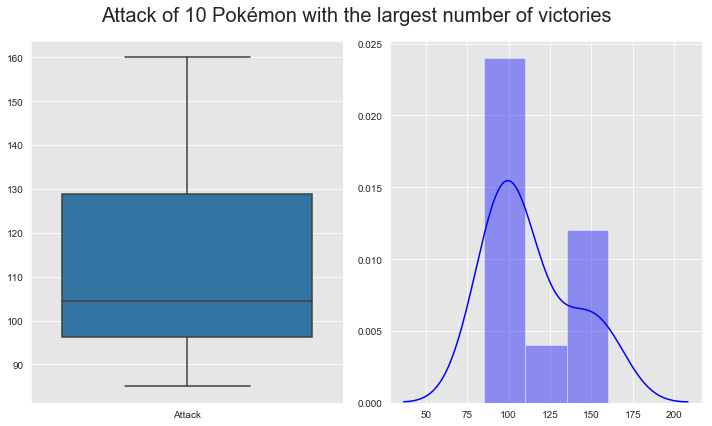

,count,mean,std,min,25%,50%,75%,max
Attack,10.0,113.4,25.863746,85.0,96.25,104.5,128.75,160.0


In [25]:
plot.describe_data(winners10.Attack, 'Attack of 10 Pokémon with the largest number of victories')

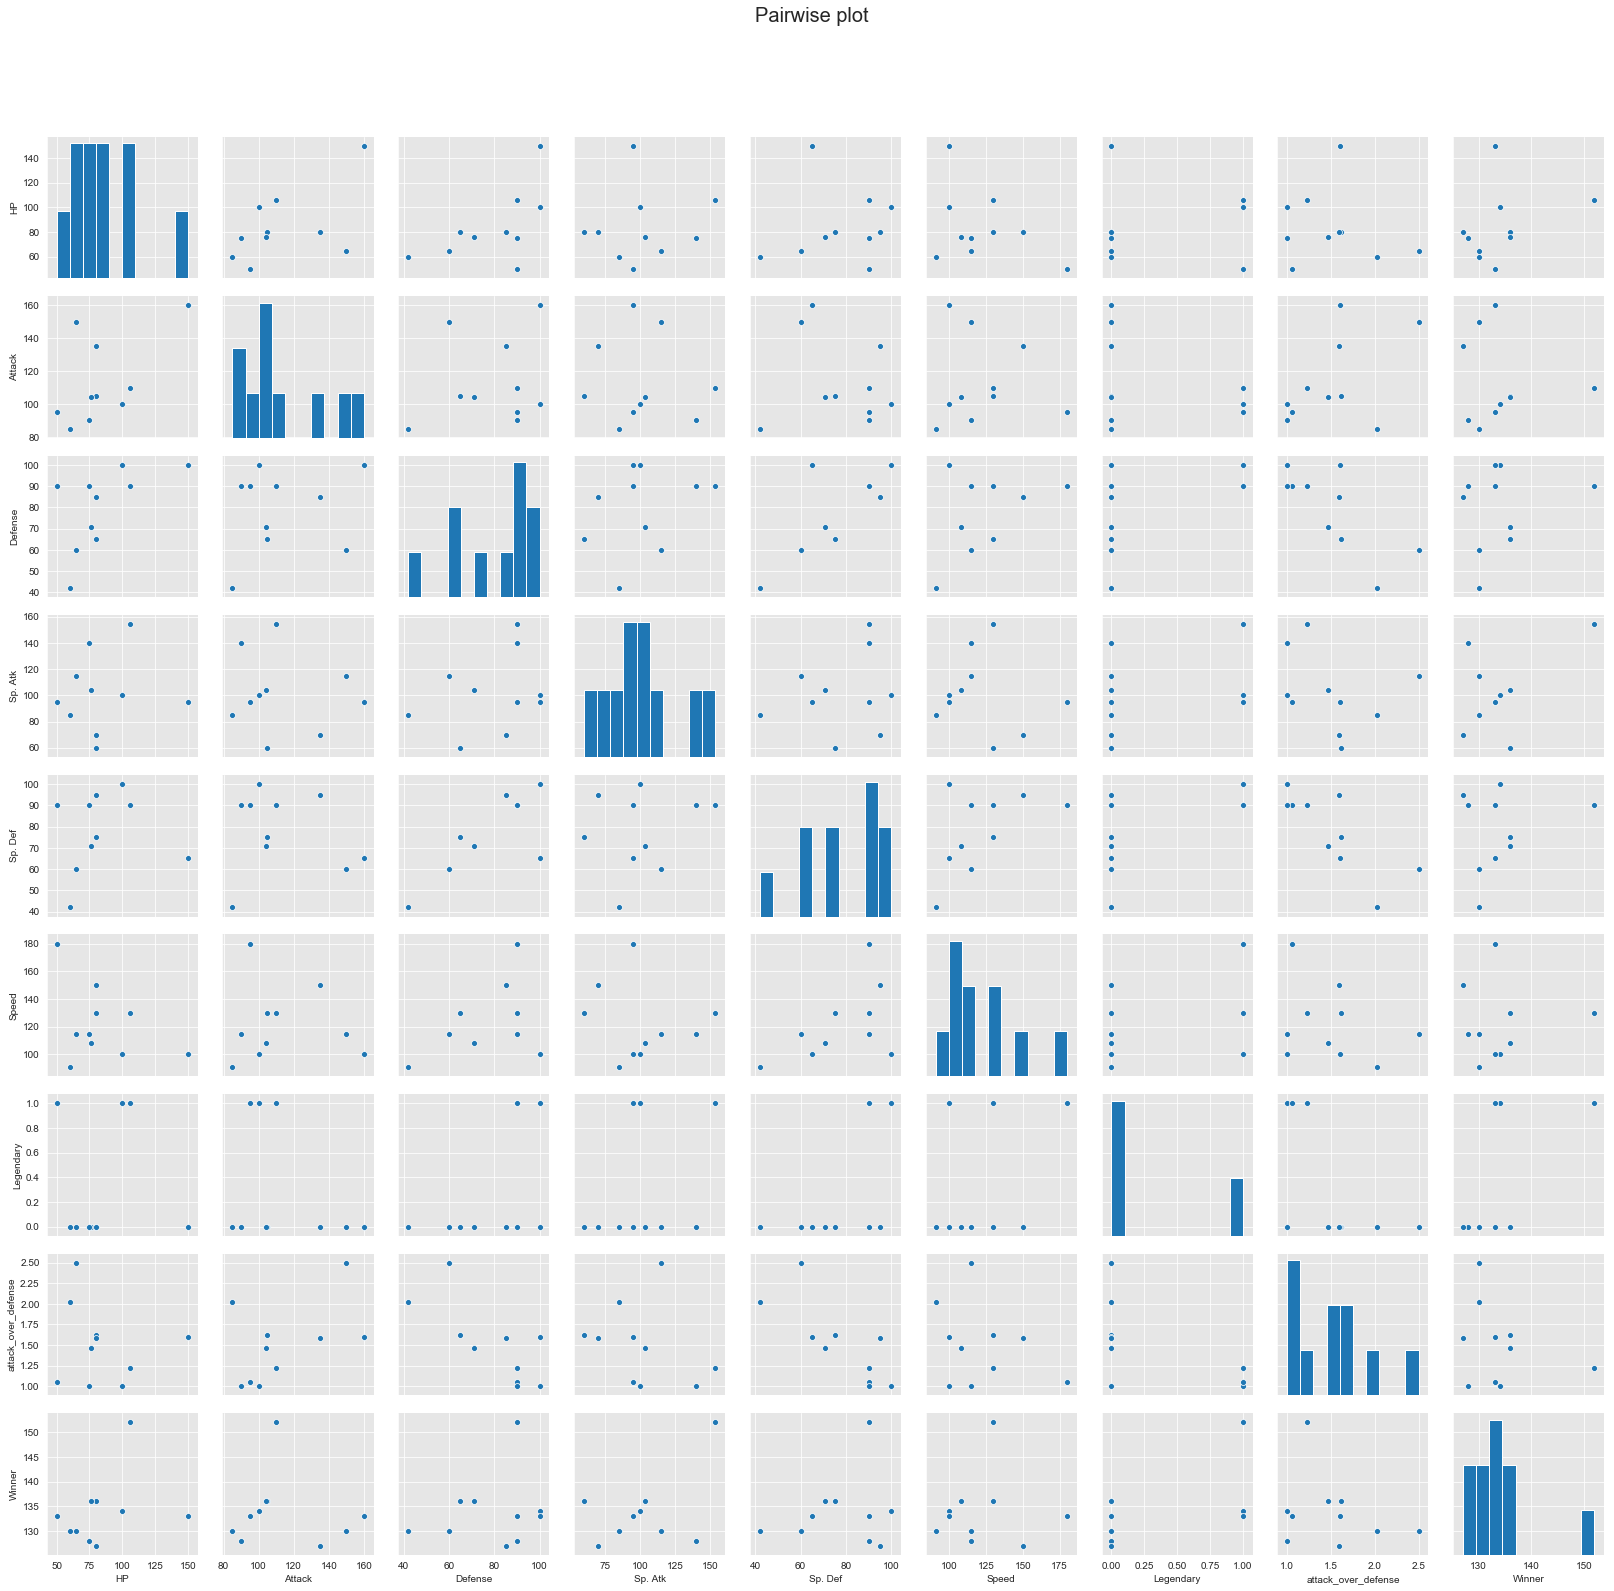

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense,Winner
HP,1.000000,0.589668,0.574118,0.067073,0.301551,-0.150310,0.114307,-0.140244,0.414118
Attack,0.589668,1.000000,0.141555,0.000000,-0.092031,0.165145,-0.189934,0.407297,0.091747
Defense,0.574118,0.141555,1.000000,0.268539,0.610595,0.018634,0.540062,-0.731537,0.170811
Sp. Atk,0.067073,0.000000,0.268539,1.000000,0.067695,-0.076689,0.304820,-0.402439,0.190188
Sp. Def,0.301551,-0.092031,0.610595,0.067695,1.000000,0.464399,0.576838,-0.787726,0.030960
Speed,-0.150310,0.165145,0.018634,-0.076689,0.464399,1.000000,0.268359,-0.184053,-0.009259
Legendary,0.114307,-0.189934,0.540062,0.304820,0.576838,0.268359,1.000000,-0.609640,0.460044
attack_over_defense,-0.140244,0.407297,-0.731537,-0.402439,-0.787726,-0.184053,-0.609640,1.000000,-0.134972
Winner,0.414118,0.091747,0.170811,0.190188,0.030960,-0.009259,0.460044,-0.134972,1.000000


In [26]:
plot.pairwise_plot(winners10)

In [27]:
winners10.corr(method='spearman').iloc[:, 0:2]

,HP,Attack
HP,1.000000,0.589668
Attack,0.589668,1.000000
Defense,0.574118,0.141555
Sp. Atk,0.067073,0.000000
Sp. Def,0.301551,-0.092031
Speed,-0.150310,0.165145
Legendary,0.114307,-0.189934
attack_over_defense,-0.140244,0.407297
Winner,0.414118,0.091747


In [28]:
def color_green(val, thr=0.5):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'green' if val > thr else 'black'
    return 'color: %s' % color

In [29]:
corr10 = winners10.corr(method='spearman')
corr10.style.applymap(color_green)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense,Winner
HP,1,0.589668,0.574118,0.0670732,0.301551,-0.15031,0.114307,-0.140244,0.414118
Attack,0.589668,1,0.141555,0,-0.0920315,0.165145,-0.189934,0.407297,0.091747
Defense,0.574118,0.141555,1,0.268539,0.610595,0.0186339,0.540062,-0.731537,0.170811
Sp. Atk,0.0670732,0,0.268539,1,0.0676952,-0.0766886,0.30482,-0.402439,0.190188
Sp. Def,0.301551,-0.0920315,0.610595,0.0676952,1,0.464399,0.576838,-0.787726,0.0309599
Speed,-0.15031,0.165145,0.0186339,-0.0766886,0.464399,1,0.268359,-0.184053,-0.00925926
Legendary,0.114307,-0.189934,0.540062,0.30482,0.576838,0.268359,1,-0.60964,0.460044
attack_over_defense,-0.140244,0.407297,-0.731537,-0.402439,-0.787726,-0.184053,-0.60964,1,-0.134972
Winner,0.414118,0.091747,0.170811,0.190188,0.0309599,-0.00925926,0.460044,-0.134972,1


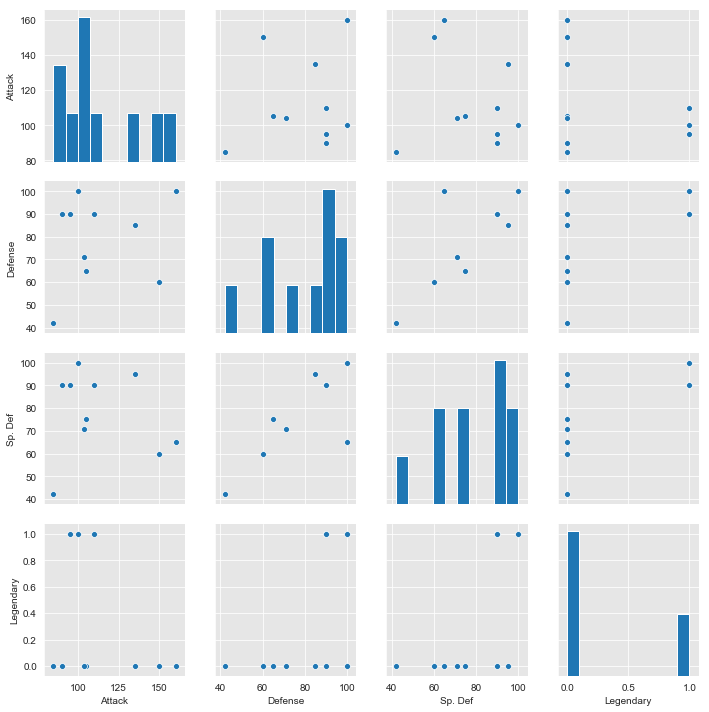

In [30]:
sns.pairplot(data=winners10[['Attack', 'Defense', 'Sp. Def', 'Legendary']]);

# 1.3

Professor Oak suspects that Pokémon in the grass class have a stronger regular attack than those in the rock class. Check if he is right and convince him of your conclusion with statistical arguments. Note: If there are Pokémon that are in both classes, discard them. Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

In [31]:
# discard pokemon in both classes
print(pokemons[(pokemons['Class 1'] == 'Grass') & (pokemons['Class 2'] == 'Rock')].Name.count())
print(pokemons[(pokemons['Class 1'] == 'Rock') & (pokemons['Class 2'] == 'Grass')].Name.count())
both_classes = pokemons[(pokemons['Class 1'] == 'Rock') & (pokemons['Class 2'] == 'Grass')].index
print(both_classes)
pokemons_no_duplicate = pokemons.copy()
pokemons_no_duplicate = pokemons_no_duplicate.drop(labels=both_classes, axis='index')

0
2
Int64Index([378, 379], dtype='int64', name='pid')


In [32]:
# check
print('Before dropping {}'.format(pokemons.Name.count()))
print('After dropping {}'.format(pokemons_no_duplicate.Name.count()))

Before dropping 799
After dropping 797


In [33]:
pokemons_grass = pokemons_no_duplicate[
    (pokemons_no_duplicate['Class 1'] == 'Grass') | (pokemons_no_duplicate['Class 2'] == 'Grass')
]
pokemons_rock = pokemons_no_duplicate[
    (pokemons_no_duplicate['Class 1'] == 'Rock') | (pokemons_no_duplicate['Class 2'] == 'Rock')
]

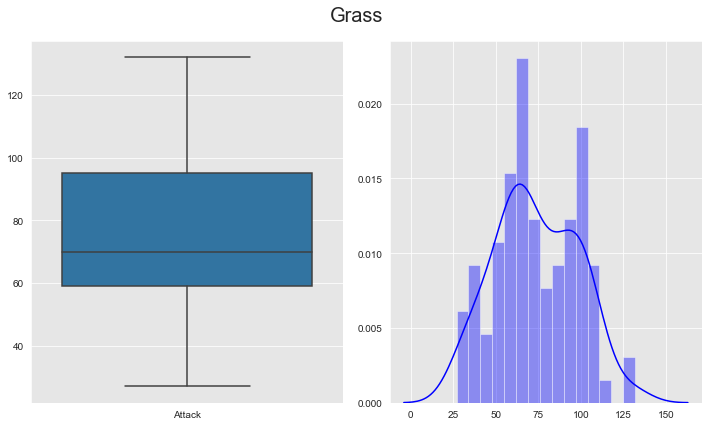

,count,mean,std,min,25%,50%,75%,max
Attack,93.0,73.731183,24.179645,27.0,59.0,70.0,95.0,132.0


In [34]:
plot.describe_data(pokemons_grass['Attack'], 
                   title='Grass', 
                   nb_bins=15)

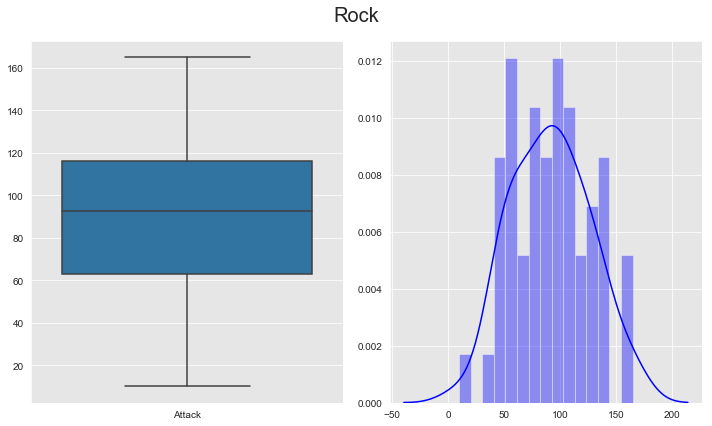

,count,mean,std,min,25%,50%,75%,max
Attack,56.0,91.785714,34.805284,10.0,63.0,92.5,116.25,165.0


In [35]:
plot.describe_data(pokemons_rock['Attack'], 
                   title='Rock', 
                   nb_bins=15)

In [36]:
stats.ttest_ind(pokemons_rock['Attack'], pokemons_grass['Attack'], equal_var=False)

Ttest_indResult(statistic=3.4169379582521513, pvalue=0.0009640546913545304)

# 1.4 list the names of the 10 Pokémon with the largest number of victories: Spark

In [37]:
"""# pokemon and combats
# create tables
combats_table = combats.registerTempTable('combats_table') 
pokemons_table = pokemons_spark.registerTempTable('pokemons_table')

# select winners
query = "
select Name, counts
from pokemons, (select winner, count(winner) as counts
                from combats_table
                group by combats_table.Winner
                order by counts desc
                limit 10
                ) as winners10
where pokemons.id == winners10.winner
"

result = spark.sql(query_c)
result.toPandas().Name"""

'#\xa0pokemon and combats\n#\xa0create tables\ncombats_table = combats.registerTempTable(\'combats_table\') \npokemons_table = pokemons_spark.registerTempTable(\'pokemons_table\')\n\n# select winners\nquery = "\nselect Name, counts\nfrom pokemons, (select winner, count(winner) as counts\n                from combats_table\n                group by combats_table.Winner\n                order by counts desc\n                limit 10\n                ) as winners10\nwhere pokemons.id == winners10.winner\n"\n\nresult = spark.sql(query_c)\nresult.toPandas().Name'

# Q2

## (3 points) Generate the feature vectors and the labels to train your model

In [38]:
pokemons.head()

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
pid,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,0,1.000000
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,0,0.984127
3,Venusaur,Grass,Poison,80,82,83,100,100,80,0,0.987952
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,0,0.813008
5,Charmander,Fire,NaN,39,52,43,60,50,65,0,1.209302


In [39]:
pokemons.reset_index(inplace=True)

In [40]:
pokemons.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,0,1.000000
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,0,0.984127
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,0,0.987952
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,0,0.813008
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,0,1.209302


In [86]:
combats = pd.read_csv('./combats.csv')

In [87]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [88]:
full_data = pd.merge(combats, pokemons, left_on='First_pokemon', right_on='pid')

In [89]:
full_data.head()

,First_pokemon,Second_pokemon,Winner,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,attack_over_defense
0,266,298,298,266,Larvitar,Rock,Ground,50,64,50,45,50,41,0,1.28
1,266,301,301,266,Larvitar,Rock,Ground,50,64,50,45,50,41,0,1.28
2,266,304,266,266,Larvitar,Rock,Ground,50,64,50,45,50,41,0,1.28
3,266,247,247,266,Larvitar,Rock,Ground,50,64,50,45,50,41,0,1.28
4,266,690,690,266,Larvitar,Rock,Ground,50,64,50,45,50,41,0,1.28


In [90]:
full_data = pd.merge(full_data, pokemons, left_on='Second_pokemon', right_on='pid')

In [91]:
full_data.head()

,First_pokemon,Second_pokemon,Winner,pid_x,Name_x,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,...,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,attack_over_defense_y
0,266,298,298,266,Larvitar,Rock,Ground,50,64,50,...,Grass,Dark,70,70,40,60,40,60,0,1.75
1,73,298,298,73,Machop,Fighting,NaN,70,80,50,...,Grass,Dark,70,70,40,60,40,60,0,1.75
2,373,298,298,373,Whiscash,Water,Ground,110,78,73,...,Grass,Dark,70,70,40,60,40,60,0,1.75
3,536,298,536,536,Fan Rotom,Electric,Flying,50,65,107,...,Grass,Dark,70,70,40,60,40,60,0,1.75
4,368,298,368,368,Zangoose,Normal,NaN,73,115,60,...,Grass,Dark,70,70,40,60,40,60,0,1.75


In [92]:
full_data.sort_values(by='Name_x')

,First_pokemon,Second_pokemon,Winner,pid_x,Name_x,Class 1_x,Class 2_x,HP_x,Attack_x,Defense_x,...,Class 1_y,Class 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,attack_over_defense_y
35418,511,597,597,511,Abomasnow,Grass,Ice,90,92,75,...,Water,Ground,75,65,55,65,55,69,0,1.181818
47856,511,636,511,511,Abomasnow,Grass,Ice,90,92,75,...,Psychic,NaN,45,30,50,55,65,45,0,0.600000
17151,511,527,527,511,Abomasnow,Grass,Ice,90,92,75,...,Psychic,Fighting,68,125,65,65,115,80,0,1.923077
34809,511,490,490,511,Abomasnow,Grass,Ice,90,92,75,...,Normal,Flying,76,65,45,92,42,91,0,1.444444
1818,511,665,511,511,Abomasnow,Grass,Ice,90,92,75,...,Electric,NaN,65,85,70,75,70,40,0,1.214286
26843,511,378,511,511,Abomasnow,Grass,Ice,90,92,75,...,Rock,Grass,66,41,77,61,87,23,0,0.532468
26131,511,266,511,511,Abomasnow,Grass,Ice,90,92,75,...,Rock,Ground,50,64,50,45,50,41,0,1.280000
32994,511,495,495,511,Abomasnow,Grass,Ice,90,92,75,...,Dragon,Ground,108,170,115,120,95,92,0,1.478261
26130,511,266,511,511,Abomasnow,Grass,Ice,90,92,75,...,Rock,Ground,50,64,50,45,50,41,0,1.280000
36624,511,702,702,511,Abomasnow,Grass,Ice,90,92,75,...,Grass,Fighting,91,90,72,90,129,108,1,1.250000


In [93]:
# drop class2
full_data.drop('Class 2_x', axis='columns', inplace=True)
full_data.drop('Class 2_y', axis='columns', inplace=True)

In [94]:
full_data.head()

,First_pokemon,Second_pokemon,Winner,pid_x,Name_x,Class 1_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,...,Name_y,Class 1_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,attack_over_defense_y
0,266,298,298,266,Larvitar,Rock,50,64,50,45,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
1,73,298,298,73,Machop,Fighting,70,80,50,35,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
2,373,298,298,373,Whiscash,Water,110,78,73,76,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
3,536,298,536,536,Fan Rotom,Electric,50,65,107,105,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
4,368,298,368,368,Zangoose,Normal,73,115,60,60,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75


In [95]:
full_data['label'] = np.where(full_data.Winner == full_data.pid_x, 1, 0)

In [96]:
full_data.head()

,First_pokemon,Second_pokemon,Winner,pid_x,Name_x,Class 1_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,...,Class 1_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,attack_over_defense_y,label
0,266,298,298,266,Larvitar,Rock,50,64,50,45,...,Grass,70,70,40,60,40,60,0,1.75,0
1,73,298,298,73,Machop,Fighting,70,80,50,35,...,Grass,70,70,40,60,40,60,0,1.75,0
2,373,298,298,373,Whiscash,Water,110,78,73,76,...,Grass,70,70,40,60,40,60,0,1.75,0
3,536,298,536,536,Fan Rotom,Electric,50,65,107,105,...,Grass,70,70,40,60,40,60,0,1.75,1
4,368,298,368,368,Zangoose,Normal,73,115,60,60,...,Grass,70,70,40,60,40,60,0,1.75,1


In [99]:
X = full_data.iloc[:, 3:-1]

In [100]:
X

,pid_x,Name_x,Class 1_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Legendary_x,...,Name_y,Class 1_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,attack_over_defense_y
0,266,Larvitar,Rock,50,64,50,45,50,41,0,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
1,73,Machop,Fighting,70,80,50,35,35,35,0,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
2,373,Whiscash,Water,110,78,73,76,71,60,0,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
3,536,Fan Rotom,Electric,50,65,107,105,107,86,0,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
4,368,Zangoose,Normal,73,115,60,60,60,90,0,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
5,659,Ferroseed,Grass,44,50,91,24,86,10,0,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
6,736,Litleo,Fire,62,50,58,73,54,72,0,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
7,638,Gothitelle,Psychic,70,55,95,95,110,65,0,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
8,129,Seaking,Water,80,92,65,65,80,68,0,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75
9,517,Tangrowth,Grass,100,100,125,110,50,50,0,...,Nuzleaf,Grass,70,70,40,60,40,60,0,1.75


In [103]:
#X.drop('Name_y', axis= 'columns', inplace=True)
X.drop('Name_x', axis= 'columns', inplace=True)

In [104]:
y = full_data.iloc[:, -1]

# (5 points) How does your model handle categorical features and Pokémon with multiple classes?

In [105]:
X['Class 1_x'] = X['Class 1_x'].astype('category').cat.codes

In [106]:
X['Class 1_y'] = X['Class 1_y'].astype('category').cat.codes

In [107]:
X.head()

,pid_x,Class 1_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Legendary_x,attack_over_defense_x,pid_y,Class 1_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Legendary_y,attack_over_defense_y
0,266,15,50,64,50,45,50,41,0,1.280000,298,9,70,70,40,60,40,60,0,1.75
1,73,5,70,80,50,35,35,35,0,1.600000,298,9,70,70,40,60,40,60,0,1.75
2,373,17,110,78,73,76,71,60,0,1.068493,298,9,70,70,40,60,40,60,0,1.75
3,536,3,50,65,107,105,107,86,0,0.607477,298,9,70,70,40,60,40,60,0,1.75
4,368,12,73,115,60,60,60,90,0,1.916667,298,9,70,70,40,60,40,60,0,1.75


In [109]:
set(X['Class 1_y'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

# 3. Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (n_estimators, try values 10, 25, 50, 100) and the maximum tree depth (max_depth, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers

In [112]:
Xtr, Xte, ytr, yte = split_data_ML.split_data(X.values, y.values, ratio=0.9)

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
for estimators
    clf = RandomForestClassifier(max_depth=2, n_estimators=10)
    clf.fit(X=Xtr, y=ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## (5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

In [7]:
pokemons.head()

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,0
5,Charmander,Fire,NaN,39,52,43,60,50,65,0


In [8]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [9]:
victories = combats.Winner.value_counts()

In [82]:
fighting_pokemons2 = pd.DataFrame(index=pokemons.index, 
                                 data=np.zeros((pokemons.shape[0], 1), dtype='uint'), 
                                 columns=['Winning_ratio'])

In [83]:
fighting_pokemons2.loc[victories.index, 1] = victories.values

In [84]:
fighting_pokemons2.head()

,Winning_ratio,1
pid,,
1,0,37.0
2,0,46.0
3,0,89.0
4,0,70.0
5,0,55.0


In [85]:
pokes = combats.columns[:2].values
battles1 = combats[pokes[0]].value_counts()
battles2 = combats[pokes[1]].value_counts()
fighting_pokemons2.loc[battles.index, 2] = battles1.values + battles2.values

In [86]:
fighting_pokemons2.head()

,Winning_ratio,1,2
pid,,,
1,0,37.0,126.0
2,0,46.0,132.0
3,0,89.0,128.0
4,0,70.0,126.0
5,0,55.0,124.0


In [89]:
# ratio
fighting_pokemons2['Winning_ratio'] = fighting_pokemons2[fighting_pokemons2.columns[1]] /fighting_pokemons2[fighting_pokemons2.columns[2]]

In [91]:
fighting_pokemons2.iloc[18]

Winning_ratio      0.727273
1                 80.000000
2                110.000000
Name: 19, dtype: float64

In [94]:
fighting_pokemons2.iloc[18]

Winning_ratio      0.727273
1                 80.000000
2                110.000000
Name: 19, dtype: float64

In [96]:
# drop nans
fighting_pokemons2.dropna(inplace=True)

In [97]:
fighting_pokemons2.Winning_ratio.describe().T

count    783.000000
mean       0.505470
std        0.262747
min        0.021127
25%        0.285218
50%        0.486111
75%        0.711246
max        1.234043
Name: Winning_ratio, dtype: float64

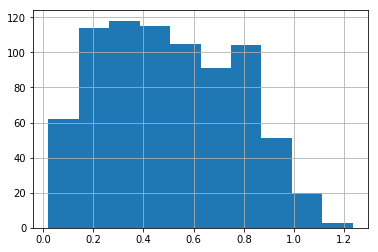

In [98]:
fighting_pokemons2.Winning_ratio.hist()

In [99]:
fighting_pokemons2.Winning_ratio[fighting_pokemons2.Winning_ratio > 1].count()

18

In [100]:
fighting_pokemons2.head()

,Winning_ratio,1,2
pid,,,
1,0.293651,37.0,126.0
2,0.348485,46.0,132.0
3,0.695312,89.0,128.0
4,0.555556,70.0,126.0
5,0.443548,55.0,124.0


In [102]:
fighting_pokemons2.sort_values(by='Winning_ratio', ascending=False).head(10).index

Int64Index([513, 20, 552, 476, 421, 429, 709, 164, 633, 694], dtype='int64', name='pid')

In [104]:
pokemons.loc[fighting_pokemons2.sort_values(by='Winning_ratio', ascending=False).head(10).index]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
513,Weavile,Dark,Ice,70,120,65,45,85,125,0
20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,0
552,Shaymin Sky Forme,Grass,Flying,100,103,75,120,75,127,1
476,Lopunny,Normal,NaN,65,76,84,54,96,105,0
421,Mega Latios,Dragon,Psychic,80,130,100,160,120,110,1
429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,1
709,Landorus Incarnate Forme,Ground,Flying,89,125,90,115,80,101,1
164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1
633,Zoroark,Dark,NaN,60,105,60,120,60,105,0
